#### Run the Dino Run and get an image.

In [35]:
import scipy.misc

import random
from PIL import Image
import base64
import numpy as np

import os
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras import optimizers

from io import BytesIO
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from matplotlib import pyplot as plt

chrome_driver_path = '\\driver\\chromedriver.exe'

In [2]:
chrome_options = Options()
chrome_options.add_argument("disable-infobars")
chrome_options.add_argument("--mute-audio")
driver = webdriver.Chrome(executable_path = chrome_driver_path ,options=chrome_options)
driver.get('chrome://dino')

#make one jump
driver.find_element_by_tag_name("body").send_keys(Keys.ARROW_UP)

js_get_image = "return (document.getElementsByClassName('runner-canvas')[0]).toDataURL('image/png').substring(22);"
base64_image = str(driver.execute_script(js_get_image))
print(base64_image)



iVBORw0KGgoAAAANSUhEUgAAAlgAAACWCAYAAAACG/YxAAAK10lEQVR4Xu3dwVLjOBQFULLk++hlfx7L5vt6mSmYMUMZjO/DimJbZzZdNdxY1pFI3xZJuDz4jwABAgQIECBAoKnApenVXIwAAQIECBAgQOBBwbIJCBAgQIAAAQKNBRSsxqAuR4AAAQIECBBQsOwBAgQIECBAgEBjAQWrMajLESBAgAABAgQULHuAAAECBAgQINBYQMFqDOpyBAgQIECAAAEFyx4gQIAAAQIECDQWULAag7ocAQIECBAgQEDBsgcIECBAgACB5gJPT0/Xjxd9eXlZ7BxHyyZYClaiJEOAAAECBAjEAvPC9F3ROlo2RVCwUik5AgQIECBAIBKYStN0avWxRM1Pso6WjQAeHvyqnBRKjgABAgQIEFgXWCpTX/3/o2XXZ/9/wglWRUuWAAECBAgQ+FbgaKWpcr+VpVewKlqyBAgQIECAgIIV7AEFK0ASIUCAAAECBDKByonQ0bKZwL8pBauiJUuAAAECBAjEJ1ivwe9e6L708Qxrr9e613UrS69gVbRkCRAgQIAAgVWB7wrS0rsIvypNe8yuTv6/gIKVSskRIECAAAECscDRPjy0cr8JgoKVKMkQIECAAAECJYFKYTlaNoFQsBIlGQIECBAgQIBAQUDBKmCJEiBAgAABAgQSAQUrUZIhQIAAAQIECBQEFKwCligBAgQIECBAIBFQsBIlGQIECBAgQIBAQUDBKmCJEiBAgAABAgQSAQUrUZIhQIAAAQIECBQEFKwCligBAgQIECBAIBFQsBIlGQIECBAgQIBAQUDBKmCJEiBAgAABAgQSAQUrUZIhQIAAAQIECBQEFKwCligBAgQIECBAIBFQsBIlGQIECBAgQIBAQUDBKmCJEiBAgAABAgQSAQUrUZIhQIAAAQIECBQEFKwCligBAgQIECBAIBFQsBIlGQIECBAgQIBAQUDBKmCJEiBAgAABAgQSAQUr

In [3]:
js_get_image = "return (document.getElementsByClassName('runner-canvas')[0]).toDataURL('image/png').substring(22);"
base64_image = str(driver.execute_script(js_get_image))
print(base64_image)

iVBORw0KGgoAAAANSUhEUgAAAlgAAACWCAYAAAACG/YxAAALlUlEQVR4Xu3dQXbUOBAGYLLkPnMSwpLjsSScZO7DMvPCPOc1Jm5XtdXqkvzNhnmk2pK+UpIfxe08ffIfAQIECBAgQIBAU4GnpldzMQIECBAgQIAAgU8Clk1AgAABAgQIEGgsIGA1BnU5AgQIECBAgICAZQ8QIECAAAECBBoLCFiNQV2OAAECBAgQICBg2QMECBAgQIAAgcYCAlZjUJcjQIAAAQIECAhY9gABAgQIECBAoLGAgNUY1OUIECBAgAABAgKWPUCAAAECQwt8+fLl32UBP3/+/Gf5/8jff7Twy2tkYS7HfHvttWuNVpu1eH5+fr18zcvLy2bmGK02YiFgRZTUECBAgEBZgUiQ2gpeLQPWOjBdXnsdtEarzTZ/HZiuBa3RaqMWAlZUSh0BAgQIlBTIBqzLRSyvPXJqtT4xW661Na+3+vW41WuzjV9C03JqdRmi1idZo9VGLQSsqJQ6AgQIECgpUCFgZeYwWm226Vth6qO/H602YyFgZbTUEiBAgEA5gWs/blsmu3VC1eoEa7TQlJlvtuGjhabMfDMWAlZGSy0BAgQIlBMQsP6/sT8TmjK12YZnAstotRkLASujpZYAAQIEygkcCQtOsP58p+O1e8GijR8tNGXmGzV4qxOwMlpqCRAgQKCcQLWA9QZ07Ub3rcczfLSOCrXZhm89cmHvHqy3ca7dFF/huhkLASujpZYAAQIEyglUCFhbP6LbOiG7FqauPdJhHdx61Wabfi1Mbb2L8KOAVbE2aiFgRaXUESBAgEBJgWzA2rtn68gjG0Z7eGhmvtnmj/bw0Mx8IxYCVkRJDQECBAiUFRCw/mxNJjRlarMbIBNYRquNWAhYESU1BAgQIECAAIGEgICVwFJKgAABAgQIEIgICFgRJTUECBAgQIAAgYSAgJXAUkqAAAECBAgQiAgIWBElNQQIECBAgACBhICAlcBS

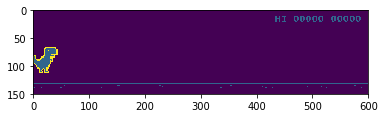

In [4]:
img = Image.open(BytesIO(base64.b64decode(base64_image)))
img = np.array(img)
img = img[:,:,0] #get one channel
plt.imshow(img)


In [5]:
img.shape

(150, 600)

#### Game Module

In [29]:
class Game:
    def __init__(self, driver):
        self._driver = driver
        driver.get('chrome://dino')
        print(driver.title)
    def restart(self):
        self._driver.execute_script("Runner.instance_.restart()")
    def press_up(self):
        self._driver.find_element_by_tag_name("body").send_keys(Keys.ARROW_UP)
    def press_down(self):
        self._driver.find_element_by_tag_name("body").send_keys(Keys.ARROW_DOWN)
    def get_score(self):
        score_array = self._driver.execute_script("return Runner.instance_.distanceMeter.digits")
        score = ''.join(score_array)
        return int(score)
    def get_crashed(self):
        return self._driver.execute_script("return Runner.instance_.crashed")
    def get_playing(self):
        return self._driver.execute_script("return Runner.instance_.playing")
    def end(self):
        self._driver.close()

#### Agent Module

In [7]:
class DinoAgent:
    def __init__(self,game): #takes game as input for taking actions
        self._game = game; 
        self.jump(); #to start the game, we need to jump once
    def is_crashed(self):
        return self._game.get_crashed()
    def jump(self):
        self._game.press_up()
    def down(self):
        self._game.press_down()

#### Game State

In [55]:
class Game_sate:
    def __init__(self,agent,game):
        self._agent = agent
        self._game = game
        
    def get_state(self,actions):

        is_over = False #game over
        
        if actions[0] == 1:
            # a little bit more reward for doing noting, so the agent should prefer this state (not to constantly jump)
            reward = 0.2
            
        if actions[1] == 1:
            self._agent.jump()
            reward = 0.1
            
        if actions[2] == 1:
            self._agent.down()
            reward = 0.1
        print(self._game._driver.title)
        image = take_screenshot(self._game._driver) 
        #self._display.send(image) #display the image on screen
        image = image.reshape(150,150,1)
        
        if self._agent.is_crashed():
            
            #scores_df.loc[len(loss_df)] = score # log the score when game is over
            self._game.restart()
            reward = -1
            is_over = True
            
        return image, reward, is_over #return the Experience tuple

#### Some functions

In [76]:
def take_screenshot(_driver):
    js_get_image = "return (document.getElementsByClassName('runner-canvas')[0]).toDataURL('image/png').substring(22);"
    base64_image = str(driver.execute_script(js_get_image))    
    img = Image.open(BytesIO(base64.b64decode(base64_image)))
    img = np.array(img)
    img = img[:,:,0] #get one channel
    img = img[:150,:150] # crop
    #scipy.misc.imsave('outfile.jpg', img)
    return img


#### Parameters

In [10]:
num_actions = 3 # jump, dawn, nothing 
gamma = 0.99 # decay rate of past observations
observations = 100 # timesteps to observe before training
explore = 100000 # frames to explore over which to anneal epsilon
final_epsilon = 0.0001
initial_epsilon = 0.1 
replay_memory = 50000 # number of previous transitions to remmember
batch = 16 # size of minibatch
frame_per_action = 1
learning_rate = 1e-4
#img_chanels = 4 # stack 4 frames


#### Model

In [11]:
def buildmodel():
    model = Sequential()
    model.add(Conv2D(32, (8, 8), padding='same',strides=(4, 4),input_shape=(150,150,1))) 
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (4, 4),strides=(2, 2),  padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3),strides=(1, 1),  padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(num_actions))
    adam = optimizers.Adam(lr=learning_rate)
    model.compile(loss='mse',optimizer=adam)
    
    #create model file if not present
    if not os.path.isfile('model'):
        model.save_weights('model.h5')
    print("Model compiled.")
    return model

#### Experience

In [72]:

class ExperienceReplay(object):
    """
    During gameplay all the experiences < s, a, r, s’ > are stored in a replay memory.
    In training, batches of randomly drawn experiences are used to generate the input and target for training.
    """
    
    def __init__(self, max_memory=100000, discount=.9):
        """
        Setup
        max_memory: the maximum number of experiences we want to store
        memory: a list of experiences
        discount: the discount factor for future experience
        In the memory the information whether the game ended at the state is stored seperately in a nested array
        [...
        [experience, game_over]
        [experience, game_over]
        ...]
        """
        self.max_memory = max_memory
        self.memory = list()
        self.discount = discount
        
        
    def remember(self, states, game_over):
        # Save a state to memory
        self.memory.append([states, game_over])
        # We don't want to store infinite memories, so if we have too many, we just delete the oldest one
        if len(self.memory) > self.max_memory:
            del self.memory[0]

            
    def get_batch(self, model, batch_size=10):

        # How many experiences do we have?
        len_memory = len(self.memory)

        # Calculate the number of actions that can possibly be taken in the game.
        #num_actions = model.output_shape[-1]

        # Dimensions of our observed states, ie, the input to our model.
        #env_dim = self.memory[0][0][0].shape[1]
        
        # We want to return an input and target vector with inputs from an observed state.
        #nputs = np.zeros((min(len_memory, batch_size), env_dim))

        inputs = np.zeros((min(len_memory, batch_size), 150, 150, 1))
        
        # ...and the target r + gamma * max Q(s’,a’)
        # Note that our target is a matrix, with possible fields not only for the action taken but also
        # for the other possible actions. The actions not take the same value as the prediction to not affect them
        targets = np.zeros((inputs.shape[0], num_actions))

        # We draw states to learn from randomly
        for i, idx in enumerate(np.random.randint(0, len_memory,
                                                  size=inputs.shape[0])):
            """
            Here we load one transition <s, a, r, s’> from memory
            state_t: initial state s
            action_t: action taken a
            reward_t: reward earned r
            state_tp1: the state that followed s’
            """
            state_t, action_t, reward_t, state_tp1 = self.memory[idx][0]

            # We also need to know whether the game ended at this state
            game_over = self.memory[idx][1]

            # add the state s to the input
            inputs[i:i + 1,...] = state_t

            # First we fill the target values with the predictions of the model.
            # They will not be affected by training (since the training loss for them is 0)
            targets[i] = model.predict( np.expand_dims(state_t, axis=0) )[0] 

            """
            If the game ended, the expected reward Q(s,a) should be the final reward r.
            Otherwise the target value is r + gamma * max Q(s’,a’)
            """
            #  Here Q_sa is max_a'Q(s', a')
    
            Q_sa = np.max(model.predict( np.expand_dims( state_tp1, axis=0) )[0])

            # if the game ended, the reward is the final reward
            if game_over:  # if game_over is True
                targets[i, action_t] = reward_t
            else:
            
                # r + gamma * max Q(s’,a’)
                targets[i, action_t] = reward_t + self.discount * Q_sa
        return inputs, targets

#### Train Module

In [74]:
def train(model,game_state, epochs):
    
    epsilon = initial_epsilon
    
    # Reseting the win counter
    win_cnt = 0
    win_hist = []
    
    for e in range(epochs):
        action = np.zeros(num_actions)
        action[0] = 1 #0 => do nothing,
                          #1=> jump
                          #2=> down
        new_state, reward, game_over = game_state.get_state(action) # get next step after performing the action => image, reward, is_over

        initial_state = new_state

        while not game_over: #endless running


            loss = 0
            Q_sa = 0
            action_index = 0
            reward = 0 #reward at 4
            action = np.zeros([num_actions]) # action at t

            initial_state = new_state
            
            if  random.random() <= epsilon: #randomly explore an action
                print("Take Random Action")
                action_index = random.randrange(num_actions)
                action[action_index] = 1
            else: # predict the output
                
                q = model.predict( np.expand_dims(initial_state, axis=0) )      
                max_Q = np.argmax(q)         # chosing index with maximum q value
                action_index = max_Q 
                action[action_index] = 1        # 0=> do nothing, 1=> jump, 2=>  down

            #We reduced the epsilon (exploration parameter) gradually
            if epsilon > final_epsilon:
                epsilon -= (initial_epsilon - final_epsilon) / explore  

            #run the selected action and observed next state and reward
            new_sate, reward, game_over = game_state.get_state(action)

            #print('fps: {0}'.format(1 / (time.time()-last_time))) # helpful for measuring frame rate
            #last_time = time.time()

            # ~ measure of win, every not die is win
            if not game_over:
                win_cnt += 1

            """
            The experiences < s, a, r, s’ > we make during gameplay are our training data.
            Here we first save the last experience, and then load a batch of experiences to train our model
            """
            # store experience
            exp_replay.remember([initial_state, action.astype(int), reward, new_state], game_over)

            # Load batch of experiences
            inputs, targets = exp_replay.get_batch(model, batch_size=batch_size)

            # train model on experiences
            batch_loss = model.train_on_batch(inputs, targets)

            loss += batch_loss
            print("Epoch {:03d}/{:03d} | Loss {:.4f} | Win count {}".format(e, epochs, loss, win_cnt))

            # Track win history to later check if our model is improving at the game over time.
            win_hist.append(win_cnt)
    return win_hist


In [79]:
epochs = 100
model = buildmodel()

chrome_options = Options()
#chrome_options.add_argument('--headless')
chrome_options.add_argument("disable-infobars")
chrome_options.add_argument("--mute-audio")
driver = webdriver.Chrome(executable_path = chrome_driver_path, options=chrome_options)
#driver.set_window_position(x=-10,y=0)

game = Game(driver)
agent = DinoAgent(game)
game_state = Game_sate(agent,game) 

batch_size = 100  # Number of experiences we use for training per batch
exp_replay = ExperienceReplay(max_memory=replay_memory)

hist = train(model, game_state, epochs)


Model compiled.
chrome://dino/
chrome://dino/
chrome://dino/
(1, 3)
0 [1 0 0]
Epoch 000/100 | Loss 5.5422 | Win count 1
chrome://dino/
(2, 3)
0 [1 0 0]
(2, 3)
1 [0 1 0]
Epoch 000/100 | Loss 0.1757 | Win count 2
chrome://dino/
(3, 3)
0 [1 0 0]
(3, 3)
1 [0 1 0]
(3, 3)
2 [0 1 0]
Epoch 000/100 | Loss 1.5493 | Win count 3
chrome://dino/
(4, 3)
0 [0 1 0]
(4, 3)
1 [1 0 0]
(4, 3)
2 [1 0 0]
(4, 3)
3 [1 0 0]
Epoch 000/100 | Loss 0.7013 | Win count 4
chrome://dino/
(5, 3)
0 [1 0 0]
(5, 3)
1 [0 1 0]
(5, 3)
2 [0 1 0]
(5, 3)
3 [0 1 0]
(5, 3)
4 [0 1 0]
Epoch 000/100 | Loss 0.0274 | Win count 5
chrome://dino/
(6, 3)
0 [1 0 0]
(6, 3)
1 [1 0 0]
(6, 3)
2 [1 0 0]
(6, 3)
3 [1 0 0]
(6, 3)
4 [0 1 0]
(6, 3)
5 [0 1 0]
Epoch 000/100 | Loss 0.3042 | Win count 6
chrome://dino/
(7, 3)
0 [0 1 0]
(7, 3)
1 [1 0 0]
(7, 3)
2 [0 1 0]
(7, 3)
3 [1 0 0]
(7, 3)
4 [1 0 0]
(7, 3)
5 [0 1 0]
(7, 3)
6 [1 0 0]
Epoch 000/100 | Loss 0.2890 | Win count 7
chrome://dino/
(8, 3)
0 [0 1 0]
(8, 3)
1 [1 0 0]
(8, 3)
2 [1 0 0]
(8, 3)
3 [1 0

(27, 3)
22 [0 1 0]
(27, 3)
23 [1 0 0]
(27, 3)
24 [0 1 0]
(27, 3)
25 [0 1 0]
(27, 3)
26 [0 1 0]
Epoch 000/100 | Loss 0.0079 | Win count 27
chrome://dino/
(28, 3)
0 [0 1 0]
(28, 3)
1 [1 0 0]
(28, 3)
2 [1 0 0]
(28, 3)
3 [1 0 0]
(28, 3)
4 [1 0 0]
(28, 3)
5 [1 0 0]
(28, 3)
6 [0 1 0]
(28, 3)
7 [0 1 0]
(28, 3)
8 [0 1 0]
(28, 3)
9 [1 0 0]
(28, 3)
10 [1 0 0]
(28, 3)
11 [1 0 0]
(28, 3)
12 [1 0 0]
(28, 3)
13 [0 1 0]
(28, 3)
14 [1 0 0]
(28, 3)
15 [1 0 0]
(28, 3)
16 [1 0 0]
(28, 3)
17 [1 0 0]
(28, 3)
18 [0 1 0]
(28, 3)
19 [0 1 0]
(28, 3)
20 [0 1 0]
(28, 3)
21 [1 0 0]
(28, 3)
22 [1 0 0]
(28, 3)
23 [1 0 0]
(28, 3)
24 [1 0 0]
(28, 3)
25 [1 0 0]
(28, 3)
26 [1 0 0]
(28, 3)
27 [0 1 0]
Epoch 000/100 | Loss 0.0311 | Win count 28
Take Random Action
chrome://dino/
(29, 3)
0 [0 1 0]
(29, 3)
1 [1 0 0]
(29, 3)
2 [0 1 0]
(29, 3)
3 [1 0 0]
(29, 3)
4 [1 0 0]
(29, 3)
5 [1 0 0]
(29, 3)
6 [1 0 0]
(29, 3)
7 [1 0 0]
(29, 3)
8 [0 1 0]
(29, 3)
9 [0 1 0]
(29, 3)
10 [0 1 0]
(29, 3)
11 [0 1 0]
(29, 3)
12 [1 0 0]
(29, 3)
13 

0 [1 0 0]
(40, 3)
1 [1 0 0]
(40, 3)
2 [1 0 0]
(40, 3)
3 [0 1 0]
(40, 3)
4 [0 1 0]
(40, 3)
5 [1 0 0]
(40, 3)
6 [1 0 0]
(40, 3)
7 [1 0 0]
(40, 3)
8 [1 0 0]
(40, 3)
9 [1 0 0]
(40, 3)
10 [1 0 0]
(40, 3)
11 [0 1 0]
(40, 3)
12 [0 1 0]
(40, 3)
13 [0 1 0]
(40, 3)
14 [0 1 0]
(40, 3)
15 [1 0 0]
(40, 3)
16 [0 1 0]
(40, 3)
17 [1 0 0]
(40, 3)
18 [1 0 0]
(40, 3)
19 [1 0 0]
(40, 3)
20 [0 1 0]
(40, 3)
22 [0 1 0]
(40, 3)
23 [0 1 0]
(40, 3)
24 [1 0 0]
(40, 3)
25 [0 1 0]
(40, 3)
26 [1 0 0]
(40, 3)
27 [0 1 0]
(40, 3)
28 [0 1 0]
(40, 3)
29 [1 0 0]
(40, 3)
30 [0 1 0]
(40, 3)
31 [0 1 0]
(40, 3)
32 [0 1 0]
(40, 3)
33 [1 0 0]
(40, 3)
34 [1 0 0]
(40, 3)
35 [1 0 0]
(40, 3)
36 [1 0 0]
(40, 3)
37 [0 0 1]
(40, 3)
38 [1 0 0]
(40, 3)
39 [1 0 0]
Epoch 001/100 | Loss 0.2158 | Win count 39
chrome://dino/
(41, 3)
0 [1 0 0]
(41, 3)
1 [0 1 0]
(41, 3)
2 [1 0 0]
(41, 3)
3 [0 1 0]
(41, 3)
4 [1 0 0]
(41, 3)
5 [0 0 1]
(41, 3)
6 [0 1 0]
(41, 3)
7 [0 1 0]
(41, 3)
8 [1 0 0]
(41, 3)
9 [0 0 1]
(41, 3)
11 [0 1 0]
(41, 3)
12 [0 1 0]
(

chrome://dino/
(50, 3)
0 [0 1 0]
(50, 3)
1 [1 0 0]
(50, 3)
2 [0 1 0]
(50, 3)
3 [0 1 0]
(50, 3)
4 [0 0 1]
(50, 3)
5 [0 1 0]
(50, 3)
6 [0 0 1]
(50, 3)
7 [1 0 0]
(50, 3)
8 [0 1 0]
(50, 3)
9 [0 0 1]
(50, 3)
10 [0 1 0]
(50, 3)
11 [0 1 0]
(50, 3)
12 [1 0 0]
(50, 3)
13 [1 0 0]
(50, 3)
14 [0 1 0]
(50, 3)
15 [1 0 0]
(50, 3)
16 [0 1 0]
(50, 3)
17 [0 1 0]
(50, 3)
18 [1 0 0]
(50, 3)
19 [1 0 0]
(50, 3)
20 [0 1 0]
(50, 3)
21 [0 1 0]
(50, 3)
22 [0 1 0]
(50, 3)
23 [1 0 0]
(50, 3)
24 [1 0 0]
(50, 3)
25 [0 0 1]
(50, 3)
26 [1 0 0]
(50, 3)
27 [0 1 0]
(50, 3)
28 [0 1 0]
(50, 3)
29 [1 0 0]
(50, 3)
30 [1 0 0]
(50, 3)
31 [0 1 0]
(50, 3)
32 [0 1 0]
(50, 3)
33 [0 1 0]
(50, 3)
34 [0 1 0]
(50, 3)
35 [1 0 0]
(50, 3)
36 [0 1 0]
(50, 3)
37 [1 0 0]
(50, 3)
38 [1 0 0]
(50, 3)
39 [0 1 0]
(50, 3)
40 [1 0 0]
(50, 3)
41 [1 0 0]
(50, 3)
42 [0 1 0]
(50, 3)
43 [0 1 0]
(50, 3)
44 [1 0 0]
(50, 3)
45 [0 1 0]
(50, 3)
46 [1 0 0]
(50, 3)
47 [0 1 0]
(50, 3)
48 [1 0 0]
(50, 3)
49 [0 1 0]
Epoch 001/100 | Loss 0.0108 | Win count 49
ch

(58, 3)
14 [0 1 0]
(58, 3)
15 [1 0 0]
(58, 3)
17 [0 1 0]
(58, 3)
18 [0 1 0]
(58, 3)
19 [1 0 0]
(58, 3)
20 [0 1 0]
(58, 3)
21 [0 1 0]
(58, 3)
22 [0 1 0]
(58, 3)
24 [1 0 0]
(58, 3)
25 [0 0 1]
(58, 3)
26 [1 0 0]
(58, 3)
28 [1 0 0]
(58, 3)
29 [0 1 0]
(58, 3)
30 [1 0 0]
(58, 3)
31 [0 1 0]
(58, 3)
32 [1 0 0]
(58, 3)
33 [1 0 0]
(58, 3)
34 [1 0 0]
(58, 3)
35 [1 0 0]
(58, 3)
36 [0 0 1]
(58, 3)
37 [0 1 0]
(58, 3)
38 [0 1 0]
(58, 3)
39 [0 1 0]
(58, 3)
40 [1 0 0]
(58, 3)
41 [0 1 0]
(58, 3)
42 [1 0 0]
(58, 3)
43 [0 1 0]
(58, 3)
44 [0 1 0]
(58, 3)
45 [1 0 0]
(58, 3)
46 [0 1 0]
(58, 3)
47 [1 0 0]
(58, 3)
48 [1 0 0]
(58, 3)
49 [1 0 0]
(58, 3)
50 [0 1 0]
(58, 3)
51 [1 0 0]
(58, 3)
52 [0 1 0]
(58, 3)
53 [0 1 0]
(58, 3)
54 [0 1 0]
(58, 3)
55 [0 1 0]
(58, 3)
56 [0 1 0]
(58, 3)
57 [0 1 0]
Epoch 002/100 | Loss 0.1313 | Win count 56
chrome://dino/
(59, 3)
0 [1 0 0]
(59, 3)
1 [1 0 0]
(59, 3)
2 [1 0 0]
(59, 3)
3 [0 1 0]
(59, 3)
4 [1 0 0]
(59, 3)
6 [0 1 0]
(59, 3)
7 [1 0 0]
(59, 3)
8 [1 0 0]
(59, 3)
9 [1 0 0]
(

(65, 3)
41 [0 1 0]
(65, 3)
42 [1 0 0]
(65, 3)
43 [1 0 0]
(65, 3)
44 [1 0 0]
(65, 3)
45 [1 0 0]
(65, 3)
47 [1 0 0]
(65, 3)
48 [1 0 0]
(65, 3)
49 [0 0 1]
(65, 3)
50 [0 1 0]
(65, 3)
51 [0 1 0]
(65, 3)
52 [1 0 0]
(65, 3)
53 [0 1 0]
(65, 3)
54 [1 0 0]
(65, 3)
55 [0 1 0]
(65, 3)
56 [0 1 0]
(65, 3)
57 [0 1 0]
(65, 3)
58 [1 0 0]
(65, 3)
59 [0 1 0]
(65, 3)
60 [1 0 0]
(65, 3)
61 [1 0 0]
(65, 3)
62 [0 1 0]
(65, 3)
63 [0 1 0]
(65, 3)
64 [1 0 0]
Epoch 002/100 | Loss 1.0194 | Win count 62
chrome://dino/
chrome://dino/
(66, 3)
0 [0 1 0]
(66, 3)
1 [1 0 0]
(66, 3)
2 [1 0 0]
(66, 3)
3 [0 1 0]
(66, 3)
4 [1 0 0]
(66, 3)
5 [1 0 0]
(66, 3)
6 [1 0 0]
(66, 3)
7 [0 1 0]
(66, 3)
8 [0 0 1]
(66, 3)
9 [1 0 0]
(66, 3)
10 [0 1 0]
(66, 3)
11 [0 1 0]
(66, 3)
12 [1 0 0]
(66, 3)
13 [0 1 0]
(66, 3)
14 [1 0 0]
(66, 3)
15 [0 1 0]
(66, 3)
16 [0 1 0]
(66, 3)
17 [0 1 0]
(66, 3)
18 [1 0 0]
(66, 3)
19 [1 0 0]
(66, 3)
20 [1 0 0]
(66, 3)
21 [1 0 0]
(66, 3)
22 [0 1 0]
(66, 3)
23 [1 0 0]
(66, 3)
24 [0 1 0]
(66, 3)
25 [0 1 0]
(66, 3

(72, 3)
25 [1 0 0]
(72, 3)
26 [1 0 0]
(72, 3)
27 [0 1 0]
(72, 3)
28 [1 0 0]
(72, 3)
29 [1 0 0]
(72, 3)
30 [1 0 0]
(72, 3)
31 [0 1 0]
(72, 3)
32 [0 1 0]
(72, 3)
33 [0 1 0]
(72, 3)
34 [0 1 0]
(72, 3)
35 [1 0 0]
(72, 3)
36 [1 0 0]
(72, 3)
37 [0 1 0]
(72, 3)
38 [0 1 0]
(72, 3)
39 [1 0 0]
(72, 3)
40 [1 0 0]
(72, 3)
42 [1 0 0]
(72, 3)
43 [1 0 0]
(72, 3)
44 [0 1 0]
(72, 3)
46 [1 0 0]
(72, 3)
47 [0 1 0]
(72, 3)
48 [0 1 0]
(72, 3)
49 [1 0 0]
(72, 3)
50 [1 0 0]
(72, 3)
51 [1 0 0]
(72, 3)
52 [0 1 0]
(72, 3)
53 [1 0 0]
(72, 3)
54 [0 1 0]
(72, 3)
55 [0 1 0]
(72, 3)
56 [0 1 0]
(72, 3)
58 [1 0 0]
(72, 3)
59 [0 0 1]
(72, 3)
60 [1 0 0]
(72, 3)
61 [1 0 0]
(72, 3)
62 [0 1 0]
(72, 3)
63 [1 0 0]
(72, 3)
64 [0 1 0]
(72, 3)
65 [0 1 0]
(72, 3)
66 [0 1 0]
(72, 3)
67 [0 0 1]
(72, 3)
68 [0 1 0]
(72, 3)
69 [1 0 0]
(72, 3)
70 [0 1 0]
(72, 3)
71 [0 1 0]
Epoch 003/100 | Loss 0.2095 | Win count 69
chrome://dino/
(73, 3)
0 [1 0 0]
(73, 3)
1 [0 1 0]
(73, 3)
2 [0 1 0]
(73, 3)
3 [0 1 0]
(73, 3)
4 [0 1 0]
(73, 3)
5 [0 1 0

(78, 3)
30 [1 0 0]
(78, 3)
31 [0 1 0]
(78, 3)
32 [1 0 0]
(78, 3)
33 [0 1 0]
(78, 3)
34 [0 1 0]
(78, 3)
35 [0 1 0]
(78, 3)
36 [0 1 0]
(78, 3)
37 [0 1 0]
(78, 3)
38 [1 0 0]
(78, 3)
39 [0 1 0]
(78, 3)
40 [1 0 0]
(78, 3)
41 [0 1 0]
(78, 3)
42 [1 0 0]
(78, 3)
43 [0 1 0]
(78, 3)
44 [0 1 0]
(78, 3)
45 [0 1 0]
(78, 3)
46 [0 1 0]
(78, 3)
47 [0 1 0]
(78, 3)
48 [0 1 0]
(78, 3)
49 [1 0 0]
(78, 3)
50 [0 1 0]
(78, 3)
51 [1 0 0]
(78, 3)
52 [0 1 0]
(78, 3)
53 [1 0 0]
(78, 3)
54 [1 0 0]
(78, 3)
55 [0 0 1]
(78, 3)
56 [0 0 1]
(78, 3)
57 [0 0 1]
(78, 3)
58 [0 1 0]
(78, 3)
59 [0 1 0]
(78, 3)
60 [1 0 0]
(78, 3)
61 [0 1 0]
(78, 3)
62 [1 0 0]
(78, 3)
63 [1 0 0]
(78, 3)
64 [1 0 0]
(78, 3)
65 [1 0 0]
(78, 3)
66 [0 1 0]
(78, 3)
67 [0 1 0]
(78, 3)
68 [1 0 0]
(78, 3)
69 [0 1 0]
(78, 3)
70 [0 1 0]
(78, 3)
71 [0 0 1]
(78, 3)
72 [1 0 0]
(78, 3)
73 [1 0 0]
(78, 3)
74 [0 1 0]
(78, 3)
76 [1 0 0]
(78, 3)
77 [1 0 0]
Epoch 003/100 | Loss 0.0709 | Win count 75
chrome://dino/
(79, 3)
0 [0 1 0]
(79, 3)
1 [0 1 0]
(79, 3)
2 [1 

(84, 3)
9 [1 0 0]
(84, 3)
10 [1 0 0]
(84, 3)
11 [0 1 0]
(84, 3)
12 [1 0 0]
(84, 3)
13 [1 0 0]
(84, 3)
14 [0 1 0]
(84, 3)
15 [1 0 0]
(84, 3)
16 [0 0 1]
(84, 3)
17 [0 1 0]
(84, 3)
18 [1 0 0]
(84, 3)
19 [0 1 0]
(84, 3)
20 [1 0 0]
(84, 3)
21 [0 1 0]
(84, 3)
22 [1 0 0]
(84, 3)
23 [1 0 0]
(84, 3)
24 [1 0 0]
(84, 3)
25 [1 0 0]
(84, 3)
26 [1 0 0]
(84, 3)
27 [0 1 0]
(84, 3)
28 [1 0 0]
(84, 3)
29 [0 1 0]
(84, 3)
30 [0 1 0]
(84, 3)
31 [1 0 0]
(84, 3)
32 [0 1 0]
(84, 3)
33 [0 0 1]
(84, 3)
34 [0 1 0]
(84, 3)
35 [0 1 0]
(84, 3)
36 [0 1 0]
(84, 3)
38 [1 0 0]
(84, 3)
39 [1 0 0]
(84, 3)
40 [1 0 0]
(84, 3)
41 [0 1 0]
(84, 3)
42 [1 0 0]
(84, 3)
43 [0 1 0]
(84, 3)
44 [1 0 0]
(84, 3)
45 [0 1 0]
(84, 3)
46 [1 0 0]
(84, 3)
47 [0 1 0]
(84, 3)
48 [1 0 0]
(84, 3)
49 [0 1 0]
(84, 3)
50 [1 0 0]
(84, 3)
51 [0 1 0]
(84, 3)
52 [1 0 0]
(84, 3)
53 [1 0 0]
(84, 3)
54 [0 1 0]
(84, 3)
55 [1 0 0]
(84, 3)
56 [1 0 0]
(84, 3)
57 [1 0 0]
(84, 3)
58 [0 1 0]
(84, 3)
59 [0 1 0]
(84, 3)
60 [0 1 0]
(84, 3)
61 [1 0 0]
(84, 3)
62 [0

(89, 3)
35 [0 1 0]
(89, 3)
36 [0 1 0]
(89, 3)
37 [1 0 0]
(89, 3)
38 [0 1 0]
(89, 3)
39 [0 1 0]
(89, 3)
40 [0 1 0]
(89, 3)
41 [1 0 0]
(89, 3)
42 [0 1 0]
(89, 3)
43 [0 1 0]
(89, 3)
45 [1 0 0]
(89, 3)
46 [0 1 0]
(89, 3)
47 [1 0 0]
(89, 3)
49 [0 1 0]
(89, 3)
50 [1 0 0]
(89, 3)
51 [0 1 0]
(89, 3)
52 [1 0 0]
(89, 3)
53 [1 0 0]
(89, 3)
54 [1 0 0]
(89, 3)
55 [0 1 0]
(89, 3)
56 [1 0 0]
(89, 3)
57 [1 0 0]
(89, 3)
58 [1 0 0]
(89, 3)
59 [0 1 0]
(89, 3)
60 [1 0 0]
(89, 3)
61 [1 0 0]
(89, 3)
62 [1 0 0]
(89, 3)
63 [1 0 0]
(89, 3)
64 [0 1 0]
(89, 3)
65 [0 1 0]
(89, 3)
66 [0 1 0]
(89, 3)
67 [0 1 0]
(89, 3)
68 [0 1 0]
(89, 3)
69 [0 1 0]
(89, 3)
70 [0 1 0]
(89, 3)
71 [0 1 0]
(89, 3)
72 [0 1 0]
(89, 3)
73 [0 1 0]
(89, 3)
74 [1 0 0]
(89, 3)
75 [0 1 0]
(89, 3)
76 [0 1 0]
(89, 3)
77 [0 1 0]
(89, 3)
78 [0 1 0]
(89, 3)
79 [1 0 0]
(89, 3)
80 [0 1 0]
(89, 3)
81 [0 1 0]
(89, 3)
82 [1 0 0]
(89, 3)
83 [1 0 0]
(89, 3)
84 [1 0 0]
(89, 3)
85 [0 1 0]
(89, 3)
86 [1 0 0]
(89, 3)
87 [0 1 0]
(89, 3)
88 [1 0 0]
Epoch 004/10

(94, 3)
35 [0 1 0]
(94, 3)
36 [0 1 0]
(94, 3)
37 [1 0 0]
(94, 3)
38 [1 0 0]
(94, 3)
39 [0 1 0]
(94, 3)
40 [0 1 0]
(94, 3)
41 [1 0 0]
(94, 3)
42 [1 0 0]
(94, 3)
43 [1 0 0]
(94, 3)
46 [1 0 0]
(94, 3)
47 [0 1 0]
(94, 3)
49 [0 1 0]
(94, 3)
50 [1 0 0]
(94, 3)
51 [0 1 0]
(94, 3)
52 [0 1 0]
(94, 3)
53 [0 1 0]
(94, 3)
54 [1 0 0]
(94, 3)
55 [0 1 0]
(94, 3)
56 [1 0 0]
(94, 3)
57 [0 1 0]
(94, 3)
58 [0 1 0]
(94, 3)
59 [1 0 0]
(94, 3)
60 [1 0 0]
(94, 3)
61 [0 1 0]
(94, 3)
62 [0 1 0]
(94, 3)
63 [0 1 0]
(94, 3)
64 [0 1 0]
(94, 3)
65 [0 0 1]
(94, 3)
66 [1 0 0]
(94, 3)
67 [0 1 0]
(94, 3)
68 [0 1 0]
(94, 3)
69 [0 1 0]
(94, 3)
70 [1 0 0]
(94, 3)
71 [1 0 0]
(94, 3)
72 [0 1 0]
(94, 3)
73 [1 0 0]
(94, 3)
74 [0 1 0]
(94, 3)
75 [0 1 0]
(94, 3)
76 [0 1 0]
(94, 3)
77 [1 0 0]
(94, 3)
78 [1 0 0]
(94, 3)
79 [1 0 0]
(94, 3)
80 [1 0 0]
(94, 3)
81 [0 1 0]
(94, 3)
82 [1 0 0]
(94, 3)
83 [0 1 0]
(94, 3)
84 [0 1 0]
(94, 3)
85 [0 1 0]
(94, 3)
86 [0 1 0]
(94, 3)
87 [0 1 0]
(94, 3)
88 [0 1 0]
(94, 3)
89 [1 0 0]
(94, 3)
90 [

chrome://dino/
chrome://dino/
(99, 3)
0 [0 1 0]
(99, 3)
1 [0 1 0]
(99, 3)
2 [1 0 0]
(99, 3)
3 [0 0 1]
(99, 3)
4 [0 1 0]
(99, 3)
5 [1 0 0]
(99, 3)
6 [1 0 0]
(99, 3)
7 [1 0 0]
(99, 3)
8 [0 1 0]
(99, 3)
9 [0 1 0]
(99, 3)
10 [1 0 0]
(99, 3)
11 [1 0 0]
(99, 3)
13 [1 0 0]
(99, 3)
14 [1 0 0]
(99, 3)
15 [0 1 0]
(99, 3)
16 [0 0 1]
(99, 3)
17 [1 0 0]
(99, 3)
19 [1 0 0]
(99, 3)
20 [1 0 0]
(99, 3)
21 [1 0 0]
(99, 3)
22 [1 0 0]
(99, 3)
23 [0 1 0]
(99, 3)
24 [0 0 1]
(99, 3)
25 [1 0 0]
(99, 3)
27 [1 0 0]
(99, 3)
28 [0 0 1]
(99, 3)
29 [0 1 0]
(99, 3)
30 [1 0 0]
(99, 3)
31 [0 1 0]
(99, 3)
32 [1 0 0]
(99, 3)
34 [0 1 0]
(99, 3)
35 [0 1 0]
(99, 3)
36 [0 1 0]
(99, 3)
37 [0 1 0]
(99, 3)
38 [0 1 0]
(99, 3)
39 [0 1 0]
(99, 3)
40 [1 0 0]
(99, 3)
41 [0 1 0]
(99, 3)
42 [0 1 0]
(99, 3)
43 [1 0 0]
(99, 3)
44 [1 0 0]
(99, 3)
45 [1 0 0]
(99, 3)
46 [1 0 0]
(99, 3)
47 [1 0 0]
(99, 3)
48 [0 1 0]
(99, 3)
49 [1 0 0]
(99, 3)
50 [1 0 0]
(99, 3)
51 [1 0 0]
(99, 3)
52 [1 0 0]
(99, 3)
53 [0 1 0]
(99, 3)
54 [1 0 0]
(99, 3)
55 

(100, 3)
39 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [0 0 1]
(100, 3)
74 [0 1 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [0 0 1]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]


chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 0 1]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 0 1]
(100, 3)
31 [0 1 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [0 0 1]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 

(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 0 1]
(100, 3)
73 [0 1 0]
(100, 3)
74 [1 0 0]
(100, 3)
76 [0 1 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [1 0 0]


(100, 3)
90 [0 1 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 008/100 | Loss 0.2585 | Win count 108
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
11 [0 0 1]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [0 0 1]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [0 1 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 0 1]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
4

(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [1 0 0]
(100, 3)
62 [0 1 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [1 0 0]


(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [0 0 1]
(100, 3)
99 [1 0 0]
Epoch 009/100 | Loss 0.4093 | Win count 116
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 0 1]
(100, 3)
9 [1 0 0]
(100, 3)
10 [0 0 1]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19

(100, 3)
3 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 0 1]
(100, 3)
9 [1 0 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 

(100, 3)
31 [1 0 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [0 0 1]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]


(100, 3)
66 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 0 1]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [0 1 0]
(100, 3)
99 [1 0 0]
Epoch 010/100 | Loss 0.3491 | Win count 128
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 0 1]
(100, 3)
8 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)

(100, 3)
12 [0 1 0]
(100, 3)
13 [0 0 1]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [0 1 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 0 1]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
57 [0 0 1]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [0 1 0]


(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [0 0 1]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [0 0 1]
(100, 3)
95 [1 0 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 010/100 | Loss 0.1111 | Win count 136
chrome://dino/
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1

(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 0 1]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [1 0 0]
(100, 

(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [0 1 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [0 0 1]
(100, 3)
95 [0 0 1]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [0 1 0]
Epoch 012/100 | Loss 0.1246 | Win count 144
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 0 1]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 0 1]
(100, 3)
13 [1 0 0]
(100, 3)
14

(100, 3)
0 [1 0 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
5

(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [0 0 1]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [0 0 1]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [1 0 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
73 [0 0 1]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]


(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 0 1]
(100, 3)
30 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 0 1]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)


(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 0 1]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [1 0 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [0 0 1]
(100, 3)
77 [0 1 0]
(100, 3)
78 [0 0 1]
(100, 3)
79 [0 0 1]
(100, 3)
80 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
92 [0 1 0]


(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 0 1]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)

(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [0 1 0]
Epoch 014/100 | Loss 0.2577 | Win count 169
chrome://dino/
(100, 3)
1 [1 0 0]
(1

(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [0 1 0]
Epoch 014/100 | Loss 0.1641 | Win count 173
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
4

(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
53 [0 0 1]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [0 1 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [0 0 1]
(100, 3)
86 [1 0 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [0 0 1]
(100, 3)
91 [1 0 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [0 1 0]


(100, 3)
6 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(10

(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 0 1]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 0 1]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [1 0 0]


(100, 3)
99 [0 1 0]
Epoch 016/100 | Loss 0.0720 | Win count 188
chrome://dino/
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [1 0 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 

(100, 3)
34 [0 1 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 0 1]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [1 0 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [1 0 0]


(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [1 0 0]
Epoch 017/100 | Loss 0.2012 | Win count 196
chrome://dino/
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [0

(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [0 1 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]


(100, 3)
63 [0 1 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 019/100 | Loss 0.2540 | Win count 204
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)


(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [1 0 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [1 0 0]


(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [0 1 0]
Epoch 020/100 | Loss 0.1011 | Win count 212
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 0 1]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
24

(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 0 1]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [0 1 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [1 0 0]


(100, 3)
82 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [0 1 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
Epoch 021/100 | Loss 0.2192 | Win count 220
chrome://dino/
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 0 1]
(100, 3)
6 [1 0 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 0 1]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
3

(100, 3)
33 [0 1 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 0 1]
(100, 3)
47 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [0 0 1]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]


(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 0 1]
(100, 3)
86 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [0 1 0]
Epoch 022/100 | Loss 0.0911 | Win count 228
Take Random Action
chrome://dino/
(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 0 1]
(100, 3)
9 [1 0 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 0 1]
(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27

(100, 3)
57 [0 1 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
62 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [0 0 1]
(100, 3)
89 [0 1 0]
(100, 3)
90 [0 0 1]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [0 1 0]
Epoch 022/100 | Loss 0.1461 | Win count 232
chrome://dino/
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1

(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [0 0 1]


(100, 3)
85 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [1 0 0]
Epoch 024/100 | Loss 0.1088 | Win count 240
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
3

(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [0 1 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
84 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]


(100, 3)
87 [1 0 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 025/100 | Loss 0.0752 | Win count 248
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 0 1]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)


(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
94 [1 0 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [1 0 0]


(100, 3)
94 [0 1 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 026/100 | Loss 0.0762 | Win count 256
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [0 1 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)


(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 0 1]
(100, 3)
68 [1 0 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [0 1 0]


(100, 3)
77 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 0 1]
(100, 3)
83 [0 1 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
90 [0 1 0]
(100, 3)
91 [0 0 1]
(100, 3)
93 [0 1 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [0 1 0]
(100, 3)
99 [1 0 0]
Epoch 027/100 | Loss 0.2803 | Win count 264
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 0 1]
(100, 3)
8 [0 0 1]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 0 1]
(100, 3)
26 [0 1 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31

(100, 3)
28 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [0 0 1]
(100, 3)
62 [0 1 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [0 0 1]


(100, 3)
72 [0 1 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 028/100 | Loss 0.1718 | Win count 272
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [0 0 1]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
2

(100, 3)
1 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 0 1]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 0 1]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 0 1]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 

(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 0 1]
(100, 3)
87 [0 1 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [0 1 0]
Epoch 029/100 | Loss 0.0648 | Win count 280
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [0 1 0]
(100, 3)
29

(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [1 0 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 0 1]
(100, 3)
87 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [1 0 0]


chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 0 1]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [

(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [0 0 1]
(100, 3)
59 [1 0 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [0 1 0]
Epoch 031/100 | Loss 0.1984 | Win count 292
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)


Epoch 031/100 | Loss 0.2614 | Win count 296
chrome://dino/
(100, 3)
1 [1 0 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 0 1]
(100, 3)
24 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
5

(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [0 0 1]
(100, 3)
57 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [0 1 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [0 1 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [1 0 0]


chrome://dino/
chrome://dino/
(100, 3)
1 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 0 1]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0

(100, 3)
73 [0 1 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 0 1]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [0 1 0]
Epoch 033/100 | Loss 0.1040 | Win count 308
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 0 1]
(100, 3)
8 [1 0 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1 0 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 0 1]
(100, 3)
25

(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [0 1 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 0 1]
(100, 3)
68 [1 0 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [0 1 0]


Epoch 034/100 | Loss 0.1208 | Win count 316
chrome://dino/
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [1 0 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 0 1]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [1 0 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 0 1]
(100, 3)
33 [0 1 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [0 0 1]
(100, 3)
46 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 0 1]
(100, 3)
52 [1 0 0]
(100, 3)
53 [1 0 0]
(100, 3

(100, 3)
69 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 0 1]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [1 0 0]
Epoch 035/100 | Loss 0.3656 | Win count 320
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20

(100, 3)
31 [0 1 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [0 0 1]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
62 [0 1 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [0 1 0]


chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1

(100, 3)
46 [0 0 1]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [0 1 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [0 0 1]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [0 1 0]


(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [1 0 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [0 1 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [0 1 0]
Epoch 037/100 | Loss 0.1742 | Win count 336
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
21 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [1 0 0]
(100, 3)


(100, 3)
24 [1 0 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [0 0 1]


(100, 3)
78 [1 0 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [0 1 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [0 1 0]
Epoch 038/100 | Loss 0.1283 | Win count 344
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
17 [0 0 1]
(100, 3)
18 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [1 0 0]
(100, 3)
28

(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [0 1 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [0 1 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]


(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 0 1]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [0 1 0]
(100, 3)
23 [0 0 1]
(100, 3)
24 [1 0 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [0 0 1]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)

(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [0 1 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [1 0 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 039/100 | Loss 0.1126 | Win count 357
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [0 0 1]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
21

(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [0 1 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]


Epoch 040/100 | Loss 0.0913 | Win count 365
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [0 0 1]
(100, 3)
21 [1 0 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 0 1]
(100, 3)
25 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [1 0 0]
(100, 3)


(100, 3)
65 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [1 0 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 0 1]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 0 1]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [0 1 0]
(100, 3)
91 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
98 [1 0 0]
Epoch 041/100 | Loss 0.1274 | Win count 369
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
2

(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [0 1 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]


chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 0 1]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 0 1]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1

(100, 3)
93 [0 1 0]
(100, 3)
94 [0 1 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [1 0 0]
Epoch 043/100 | Loss 0.2434 | Win count 381
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [0 1 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [0 1 0]
(100, 3)
49 [0 1 0]
(100, 3)


(100, 3)
34 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [0 1 0]
(100, 3)
59 [0 1 0]
(100, 3)
60 [1 0 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [1 0 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
70 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [0 1 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [1 0 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
87 [1 0 0]
(100, 3)
88 [0 1 0]


(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [0 1 0]
Epoch 044/100 | Loss 0.1762 | Win count 389
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [1 0 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [0 1 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [1 0 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [1 0 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [0 0 1]
(100, 3)
39 [1 0 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [0 1 0]
(100, 3)
4

(100, 3)
69 [1 0 0]
(100, 3)
70 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [1 0 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [1 0 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [1 0 0]
(100, 3)
86 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [1 0 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 044/100 | Loss 0.1694 | Win count 393
chrome://dino/
Take Random Action
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
3 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [1 0 0]
(100, 3)
11 [0 0 1]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [0 1 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [0 1 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [

(100, 3)
21 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [0 1 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [0 1 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [1 0 0]
(100, 3)
59 [1 0 0]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [1 0 0]
(100, 3)
71 [0 1 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]


91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [0 1 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [0 1 0]
Epoch 045/100 | Loss 0.1713 | Win count 401
chrome://dino/
chrome://dino/
(100, 3)
0 [1 0 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [0 1 0]
(100, 3)
3 [0 1 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [1 0 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [1 0 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [0 1 0]
(100, 3)
17 [1 0 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [0 1 0]
(100, 3)
22 [0 1 0]
(100, 3)
23 [0 1 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [1 0 0]
(100, 3)
40 [1 0 0]
(100, 3)
41 [0 1 0]
(100

(100, 3)
33 [1 0 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [1 0 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [1 0 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [0 1 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [0 1 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [0 1 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [0 1 0]
(100, 3)
54 [0 1 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [0 1 0]
(100, 3)
57 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [1 0 0]
(100, 3)
60 [0 1 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [0 1 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [1 0 0]
(100, 3)
66 [1 0 0]
(100, 3)
67 [0 0 1]
(100, 3)
68 [0 1 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [0 1 0]
(100, 3)
75 [0 0 1]
(100, 3)
76 [0 1 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]


(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [0 1 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 047/100 | Loss 0.3061 | Win count 409
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [0 1 0]
(100, 3)
4 [0 1 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [0 1 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [0 1 0]
(100, 3)
16 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
18 [0 1 0]
(100, 3)
19 [1 0 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [0 1 0]
(100, 3)
26 [1 0 0]
(100, 3)
27 [0 1 0]
(100, 3)
28 [0 1 0]
(100, 3)
29 [1 0 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [1 0 0]
(100, 3)
37 [1 0 0]
(100, 3)
38 [1 0 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41

(100, 3)
37 [1 0 0]
(100, 3)
38 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [1 0 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [0 1 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [1 0 0]
(100, 3)
50 [1 0 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [1 0 0]
(100, 3)
53 [0 0 1]
(100, 3)
55 [0 0 1]
(100, 3)
57 [0 1 0]
(100, 3)
58 [0 1 0]
(100, 3)
59 [1 0 0]
(100, 3)
61 [1 0 0]
(100, 3)
62 [0 1 0]
(100, 3)
63 [0 1 0]
(100, 3)
64 [0 1 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [0 1 0]
(100, 3)
68 [0 1 0]
(100, 3)
70 [0 1 0]
(100, 3)
71 [1 0 0]
(100, 3)
72 [1 0 0]
(100, 3)
73 [1 0 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [0 1 0]
(100, 3)
80 [0 1 0]
(100, 3)
81 [0 1 0]
(100, 3)
82 [0 1 0]
(100, 3)
83 [0 1 0]
(100, 3)
84 [0 1 0]
(100, 3)
85 [0 0 1]
(100, 3)
86 [0 1 0]
(100, 3)
87 [0 1 0]
(100, 3)
88 [0 1 0]
(100, 3)
89 [1 0 0]
(100, 3)
90 [1 0 0]


(100, 3)
89 [1 0 0]
(100, 3)
90 [0 1 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [0 1 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [0 1 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [1 0 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [0 1 0]
(100, 3)
99 [0 1 0]
Epoch 048/100 | Loss 0.2424 | Win count 417
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [0 1 0]
(100, 3)
2 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [1 0 0]
(100, 3)
6 [1 0 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [0 1 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [0 1 0]
(100, 3)
11 [0 1 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [0 1 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
16 [0 1 0]
(100, 3)
18 [1 0 0]
(100, 3)
20 [0 1 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [1 0 0]
(100, 3)
24 [0 1 0]
(100, 3)
25 [1 0 0]
(100, 3)
26 [0 0 1]
(100, 3)
27 [1 0 0]
(100, 3)
28 [1 0 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [0 1 0]
(100, 3)
31 [1 0 0]
(100, 3)
32 [1 0 0]
(100, 3)
33 [1 0 0]
(100, 3)
34 [1 0 0]
(100, 3)
35 [0 1 0]
(100, 3)
36 [0 1 0]
(100, 3)
38 [0 1 0]
(100, 3)
39

(100, 3)
70 [0 0 1]
(100, 3)
71 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [0 1 0]
(100, 3)
76 [0 1 0]
(100, 3)
77 [1 0 0]
(100, 3)
78 [0 1 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [0 1 0]
(100, 3)
82 [1 0 0]
(100, 3)
84 [1 0 0]
(100, 3)
85 [0 1 0]
(100, 3)
86 [1 0 0]
(100, 3)
87 [0 1 0]
(100, 3)
89 [0 1 0]
(100, 3)
90 [0 1 0]
(100, 3)
91 [0 1 0]
(100, 3)
92 [1 0 0]
(100, 3)
93 [1 0 0]
(100, 3)
94 [1 0 0]
(100, 3)
95 [1 0 0]
(100, 3)
96 [0 1 0]
(100, 3)
97 [1 0 0]
(100, 3)
98 [1 0 0]
(100, 3)
99 [1 0 0]
Epoch 048/100 | Loss 0.1195 | Win count 422
chrome://dino/
(100, 3)
0 [0 1 0]
(100, 3)
1 [1 0 0]
(100, 3)
3 [1 0 0]
(100, 3)
4 [1 0 0]
(100, 3)
5 [0 1 0]
(100, 3)
6 [0 1 0]
(100, 3)
7 [0 1 0]
(100, 3)
8 [1 0 0]
(100, 3)
9 [1 0 0]
(100, 3)
10 [1 0 0]
(100, 3)
11 [1 0 0]
(100, 3)
12 [0 1 0]
(100, 3)
13 [1 0 0]
(100, 3)
14 [1 0 0]
(100, 3)
15 [1 0 0]
(100, 3)
17 [0 1 0]
(100, 3)
19 [0 1 0]
(100, 3)
20 [1 0 0]
(100, 3)
21 [1 0 0]
(100, 3)
22 [1 0 0]
(100, 3)
23 [0 1 0]
(100, 3)
2

(100, 3)
28 [0 1 0]
(100, 3)
29 [0 1 0]
(100, 3)
30 [1 0 0]
(100, 3)
31 [0 1 0]
(100, 3)
32 [0 1 0]
(100, 3)
33 [0 1 0]
(100, 3)
34 [0 1 0]
(100, 3)
35 [1 0 0]
(100, 3)
36 [0 1 0]
(100, 3)
37 [0 1 0]
(100, 3)
39 [0 1 0]
(100, 3)
40 [0 1 0]
(100, 3)
41 [0 1 0]
(100, 3)
42 [1 0 0]
(100, 3)
43 [0 1 0]
(100, 3)
44 [0 1 0]
(100, 3)
45 [1 0 0]
(100, 3)
46 [1 0 0]
(100, 3)
47 [1 0 0]
(100, 3)
48 [1 0 0]
(100, 3)
49 [0 1 0]
(100, 3)
50 [0 1 0]
(100, 3)
51 [1 0 0]
(100, 3)
52 [0 1 0]
(100, 3)
53 [1 0 0]
(100, 3)
54 [1 0 0]
(100, 3)
55 [1 0 0]
(100, 3)
56 [1 0 0]
(100, 3)
57 [1 0 0]
(100, 3)
58 [1 0 0]
(100, 3)
60 [0 0 1]
(100, 3)
61 [0 1 0]
(100, 3)
62 [1 0 0]
(100, 3)
63 [1 0 0]
(100, 3)
64 [1 0 0]
(100, 3)
65 [0 1 0]
(100, 3)
66 [0 1 0]
(100, 3)
67 [1 0 0]
(100, 3)
68 [0 1 0]
(100, 3)
69 [0 1 0]
(100, 3)
70 [1 0 0]
(100, 3)
72 [0 1 0]
(100, 3)
73 [0 1 0]
(100, 3)
74 [1 0 0]
(100, 3)
75 [1 0 0]
(100, 3)
76 [1 0 0]
(100, 3)
77 [0 1 0]
(100, 3)
78 [1 0 0]
(100, 3)
79 [1 0 0]
(100, 3)
80 [1 0 0]


WebDriverException: Message: chrome not reachable
  (Session info: chrome=72.0.3626.109)
  (Driver info: chromedriver=2.46.628402 (536cd7adbad73a3783fdc2cab92ab2ba7ec361e1),platform=Windows NT 6.3.9600 x86_64)
